## Fichier dédié à l'établissement du modèle de régression linéaire

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from scipy.stats import pearsonr

### Chargement des données

In [2]:
df = pd.read_csv("data/qsar_fish_toxicity_norm.csv")
df_LC50 = df["LC50"]
df = df.drop(columns = "LC50")

### Etablissement du Leave-one-out pour l'entrainement sur le modèle Linéaire

In [16]:
loo = LeaveOneOut() # initialisation du LeaveOneOut
predicted_LC50 = list()
for i, (train_index, test_index) in enumerate(loo.split(df)): # parcours des index sélectionnés par le leave one out
    model = LinearRegression().fit(df.iloc[train_index], df_LC50.iloc[train_index])
    predict = model.predict(df.iloc[test_index])
    predicted_LC50.append(predict[0])
corr_coef, _ = pearsonr(df_LC50, predicted_LC50) # calcul du coefficients de corrélation

### Visualisation du résultat

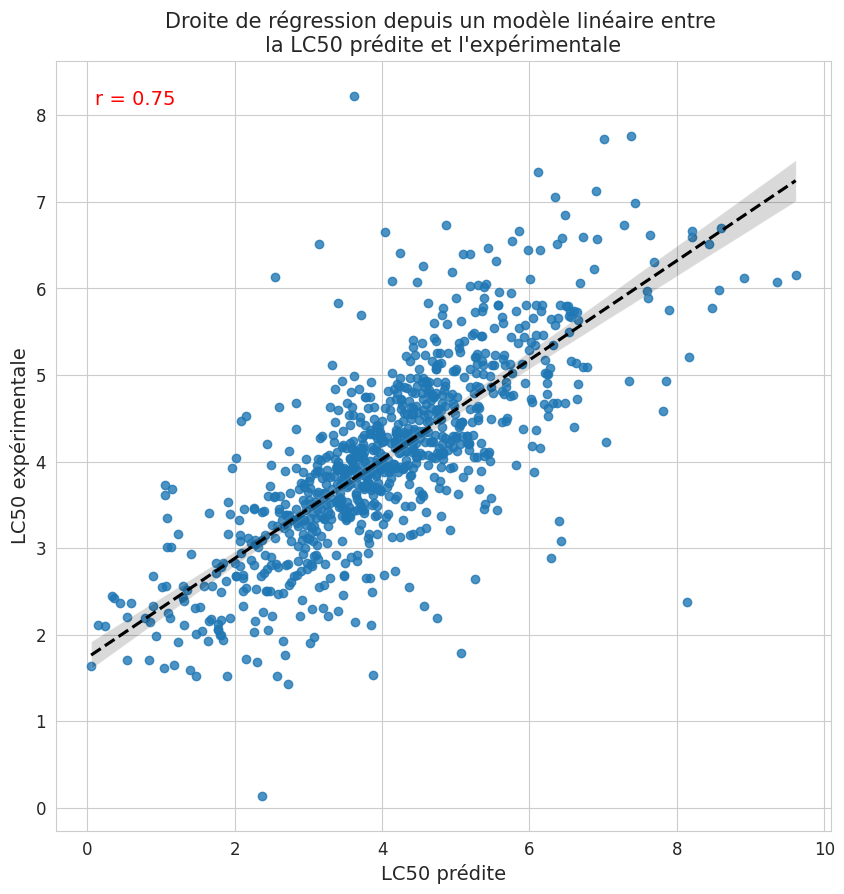

In [31]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))
sns.regplot(x = df_LC50, y = predicted_LC50, line_kws={"color" : "black", "linestyle" : "dashed"})
plt.xlabel("LC50 prédite", fontsize = 14)
plt.ylabel("LC50 expérimentale", fontsize = 14)
plt.title("Droite de régression depuis un modèle linéaire entre \nla LC50 prédite et l'expérimentale", fontsize = 15)
plt.tick_params(labelsize = 12)
plt.text(0.05, 0.95, f"r = {corr_coef:.2f}", color = "red", fontsize = 14, ha = "left", va = "center", transform = plt.gca().transAxes ) # transform sert à indiquer que les coordonnées x et y sont relatives et non absolues
plt.show()